In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
salary = pd.read_csv('../Dataset/50_Startups.csv')
salary.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


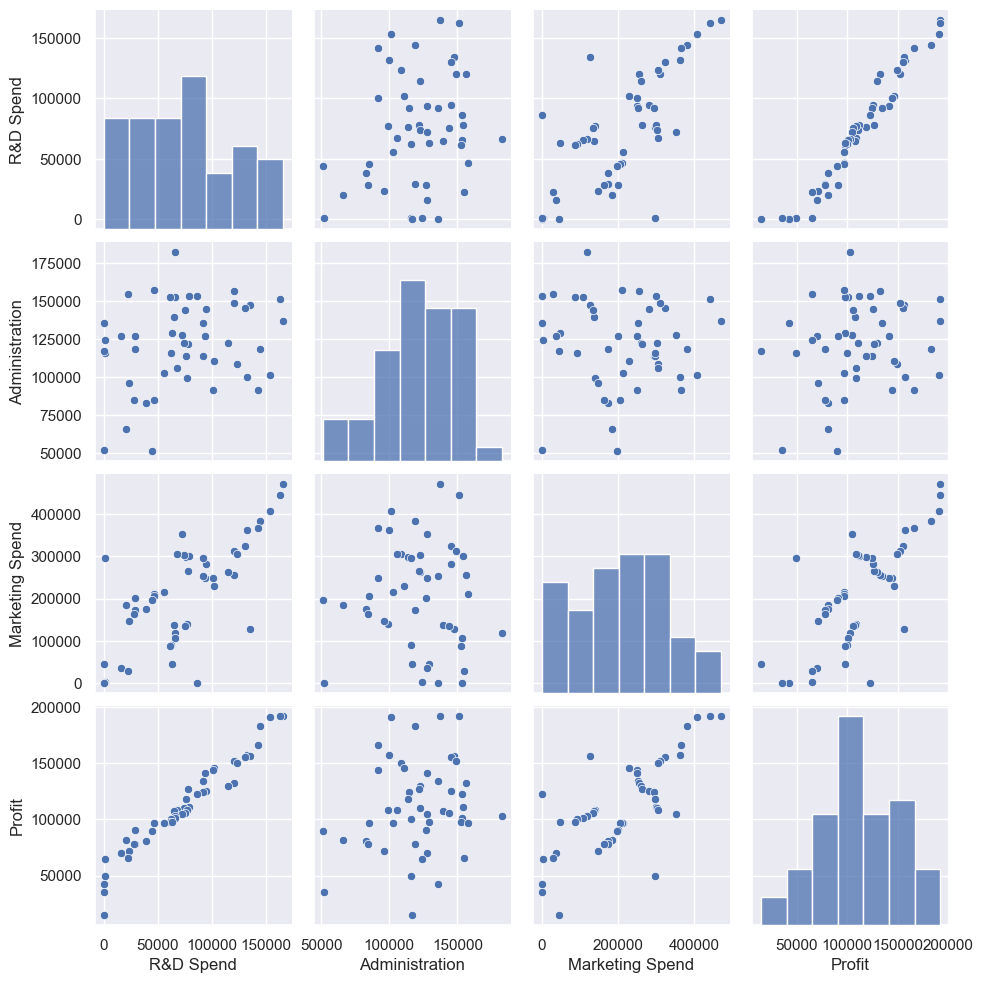

In [3]:
sns.pairplot(salary)

<Axes: >

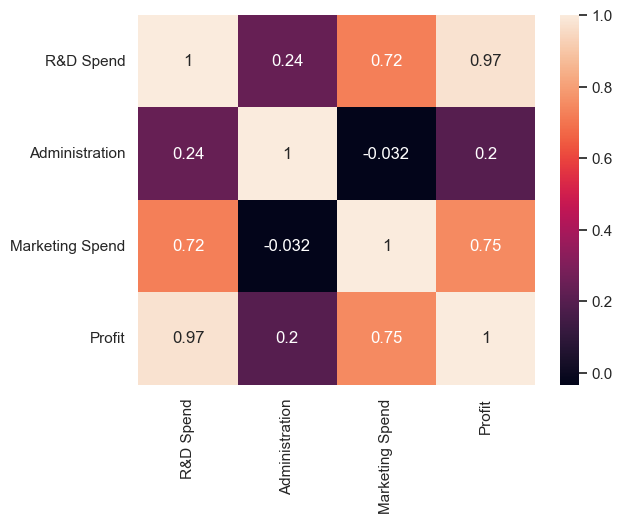

In [4]:
# Correlation between numerical variables
sns.heatmap(salary.corr(numeric_only=True), annot=True)

#### Splitting Data

In [5]:
X = salary.iloc[:, :-1].values
y = salary.iloc[:, -1].values

In [6]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

#### Avoiding Dummy Variable Trap

In [8]:
# Remove dummy variable trap ( the first column of onehotencoder )

X = X[:, 1:]
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

#### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Fitting Multiple Linear Regression to the Training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [11]:
regressor.coef_

array([-9.59284160e+02,  6.99369053e+02,  7.73467193e-01,  3.28845975e-02,
        3.66100259e-02])

In [12]:
regressor.intercept_

42554.16761776614

#### Predicting the Test set results

In [13]:
regressor.predict([[0.0, 1.0, 150000, 130000, 450]])

array([163565.08777155])

In [14]:
y_pred = regressor.predict(x_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

In [15]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [16]:
regressor.score(x_test, y_test)

0.9347068473282966

In [17]:
from sklearn.metrics import r2_score
print('R2 Score: ',r2_score(y_test, y_pred))

R2 Score:  0.9347068473282966


<Axes: >

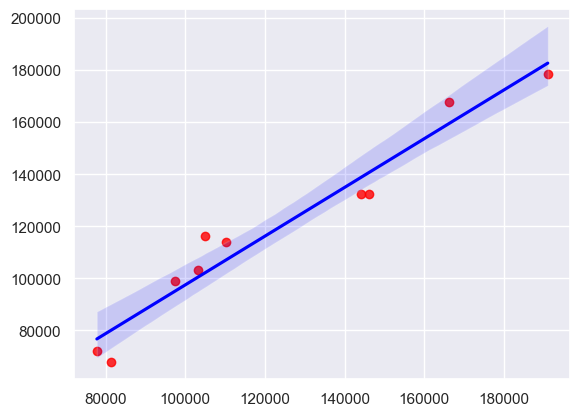

In [18]:
sns.regplot(x=y_test, y=regressor.predict(x_test), scatter_kws={"color": "red"}, line_kws={"color": "blue"})

#### Building the optimal model using Backward Elimination (statsmodels)

In [19]:
'''
import statsmodels.api as sm
import statsmodels.formula.api as sm
X_New = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis=1)   # An intercept is not included by default (in statsmodels) and should be added by the user.
                                                                            # y = b0x0 + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 (Consider x0 is a vector of 1)
X_opt = X_New[:, [0, 1, 2, 3, 4, 5]]
model = sm.OLS(endog = y, exog = X_opt).fit()
results = model.fit()
print(results.summary())

X_opt = X_New[:, [0, 1, 3, 4, 5]]
model = sm.OLS(endog = y, exog = X_opt).fit()
results = model.fit()
print(results.summary())

X_opt = X_New[:, [0, 1, 4, 5]]
model = sm.OLS(endog = y, exog = X_opt).fit()
results = model.fit()
print(results.summary())


and keep on removing the highest P-value until all P-values are less than 0.05 (These will be the significant variables)
'''

'\nimport statsmodels.api as sm\nimport statsmodels.formula.api as sm\nX_New = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis=1)   # An intercept is not included by default (in statsmodels) and should be added by the user.\n                                                                            # y = b0x0 + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 (Consider x0 is a vector of 1)\nX_opt = X_New[:, [0, 1, 2, 3, 4, 5]]\nmodel = sm.OLS(endog = y, exog = X_opt).fit()\nresults = model.fit()\nprint(results.summary())\n\nX_opt = X_New[:, [0, 1, 3, 4, 5]]\nmodel = sm.OLS(endog = y, exog = X_opt).fit()\nresults = model.fit()\nprint(results.summary())\n\nX_opt = X_New[:, [0, 1, 4, 5]]\nmodel = sm.OLS(endog = y, exog = X_opt).fit()\nresults = model.fit()\nprint(results.summary())\n\n\nand keep on removing the highest P-value until all P-values are less than 0.05 (These will be the significant variables)\n'

#### Building the optimal model using Backward Elimination (Sklearn)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [21]:
lreg = LinearRegression()
sfs1 = SFS(lreg, n_features_to_select=2, direction='backward', scoring='neg_mean_squared_error')
Backward_model = sfs1.fit(X, y)
feat_names = Backward_model.get_feature_names_out()
feat_names  # array(['x2', 'x4']

features = list(feat_names)
features                        # => 'R&D Spend', 'Marketing Spend' are the most important features that affect the profit

['x2', 'x4']

In [22]:
salary.iloc[:, :-1].head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [29]:
'''
if you are also interested in some automatic implementations of Backward Elimination in Python, please find two of them below:

Backward Elimination with p-values only:

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)
Backward Elimination with p-values and Adjusted R Squared:

import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

'''

'\nif you are also interested in some automatic implementations of Backward Elimination in Python, please find two of them below:\n\nBackward Elimination with p-values only:\n\nimport statsmodels.formula.api as sm\ndef backwardElimination(x, sl):\n    numVars = len(x[0])\n    for i in range(0, numVars):\n        regressor_OLS = sm.OLS(y, x).fit()\n        maxVar = max(regressor_OLS.pvalues).astype(float)\n        if maxVar > sl:\n            for j in range(0, numVars - i):\n                if (regressor_OLS.pvalues[j].astype(float) == maxVar):\n                    x = np.delete(x, j, 1)\n    regressor_OLS.summary()\n    return x\n \nSL = 0.05\nX_opt = X[:, [0, 1, 2, 3, 4, 5]]\nX_Modeled = backwardElimination(X_opt, SL)\nBackward Elimination with p-values and Adjusted R Squared:\n\nimport statsmodels.formula.api as sm\ndef backwardElimination(x, SL):\n    numVars = len(x[0])\n    temp = np.zeros((50,6)).astype(int)\n    for i in range(0, numVars):\n        regressor_OLS = sm.OLS(y, x).f